In [1]:
from bucket_model import BucketModel
from bucket_model_optimizer import BucketModelOptimizer
from data_preprocessor import preprocess_data

from bucket_model_plotter import plot_water_balance, plot_Q_Q, plot_ECDF, plot_KDE, plot_monthly_boxplot, plot_timeseries

import pandas as pd

In [2]:
path_to_file = '/Users/cooper/Desktop/bucket-model/data/GSTEIGmeteo.txt'
output_destination = '/Users/cooper/Desktop/bucket-model/data/GSTEIGmeteo.csv'
catchment_area = 384.2 # km^2
training_data = preprocess_data(path_to_file=path_to_file, catchment_area=catchment_area)


training_data

,day,P_mix,T_max,T_min,Q
date,,,,,
1986-01-01,1,2.5,-2.5,-11.6,0.512733
1986-01-02,2,0.2,2.6,-10.7,0.537470
1986-01-03,3,4.3,2.2,-5.3,0.532972
1986-01-04,4,3.4,-4.0,-12.9,0.526226
1986-01-05,5,3.6,1.9,-13.3,0.526226
...,...,...,...,...,...
2000-09-26,270,0.0,16.3,5.8,3.215825
2000-09-27,271,0.0,15.6,5.3,3.238313
2000-09-28,272,0.0,14.1,6.0,3.238313


In [3]:
# Initialize the BucketModel with initial parameter guesses
bucket = BucketModel(k=0.5, S_max=20, fr=0.14, rg=15.15, gauge_adj=0.05)  # 5% gauge adjustment
bucket.set_catchment_properties(0.5/100, 1638, 2035, 0, 46.9)

# Initialize the BucketModelOptimizer with the BucketModel instance and observed data
optimizer = BucketModelOptimizer(model=bucket, training_data=training_data)

# Optionally, set additional optimization options, like optimization method, parameter bounds, etc.
optimizer.set_options(method='local', bounds={'k': (0.1, 1), 'S_max': (10, 50), 'fr': (0.1, 0.3), 'rg': (10, 20), 'gauge_adj': (0, 0.1)})

In [4]:
# Run the optimization to calibrate the model parameters
calibrated_parameters = optimizer.calibrate()

In [5]:
calibrated_parameters

{'k': 0.93, 'S_max': 18.3, 'fr': 0.11, 'rg': 12.8, 'gauge_adj': 0.02}

In [6]:
bucket.update_parameters(parameters=calibrated_parameters)
bucket

BucketModel(k=0.93, S_max=18.3, fr=0.11, rg=12.8, gauge_adj=0.02)

In [7]:
results = bucket.run(training_data)

In [8]:
results

,ET,Q_s,Q_gw,Snow_accum,S,S_gw,Snow_melt,Rain,Snow,Precip
date,,,,,,,,,,
1986-01-01,0.172596,0.00000,4.007049,2.550000,18.130862,47.283184,0.0,0.000000,2.550000,2.550
1986-01-02,0.214121,0.00000,3.693999,2.744567,17.926175,43.589185,0.0,0.009433,0.194567,0.204
1986-01-03,0.254459,0.00000,3.405405,7.004835,17.797448,40.183780,0.0,0.125732,4.260268,4.386
1986-01-04,0.152730,0.00000,3.139358,10.472835,17.644718,37.044422,0.0,0.000000,3.468000,3.468
1986-01-05,0.186851,0.00000,2.894095,14.144835,17.457867,34.150327,0.0,0.000000,3.672000,3.672
...,...,...,...,...,...,...,...,...,...,...
2000-09-26,0.945163,0.00000,3.087958,0.000000,13.884568,36.437910,0.0,0.000000,0.000000,0.000
2000-09-27,0.843160,0.00000,2.846712,0.000000,13.041407,33.591198,0.0,0.000000,0.000000,0.000
2000-09-28,0.764212,0.00000,2.624312,0.000000,12.277195,30.966886,0.0,0.000000,0.000000,0.000


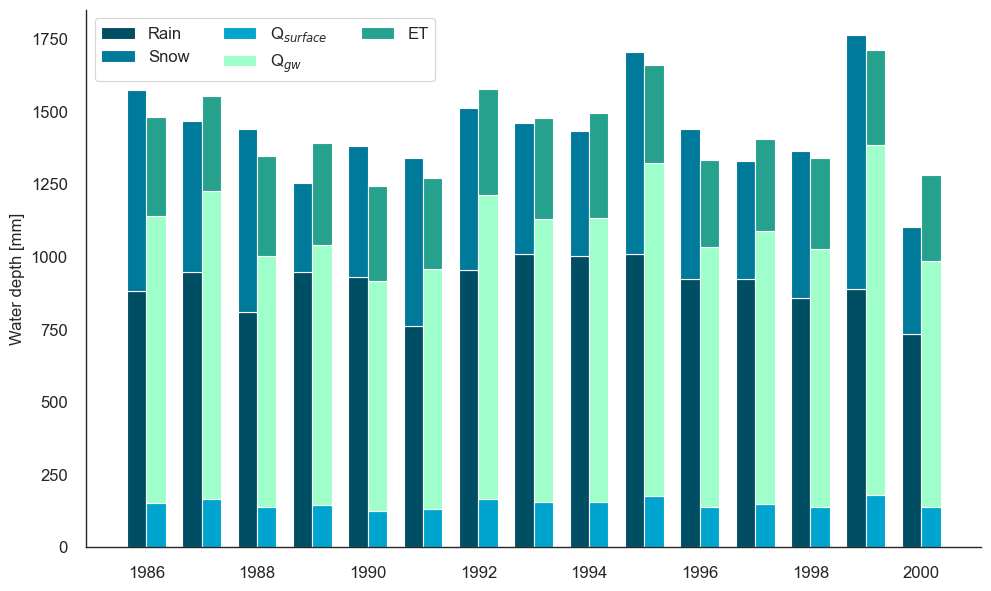

In [9]:
plot_water_balance(results)


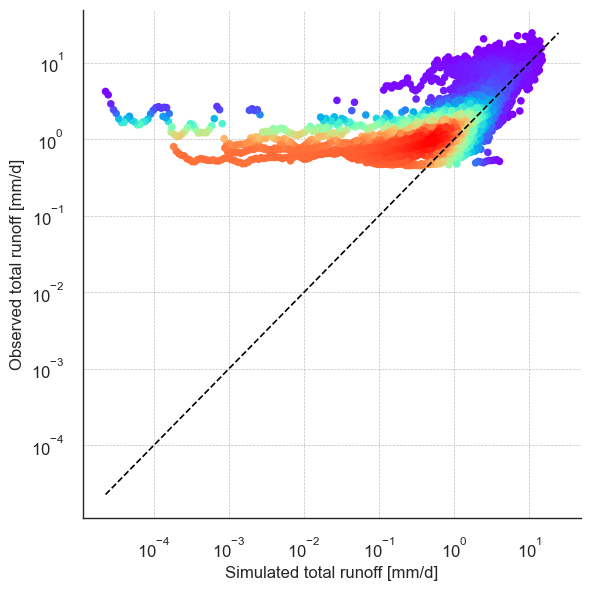

In [10]:
plot_Q_Q(results=results, validation=training_data, kde=True)

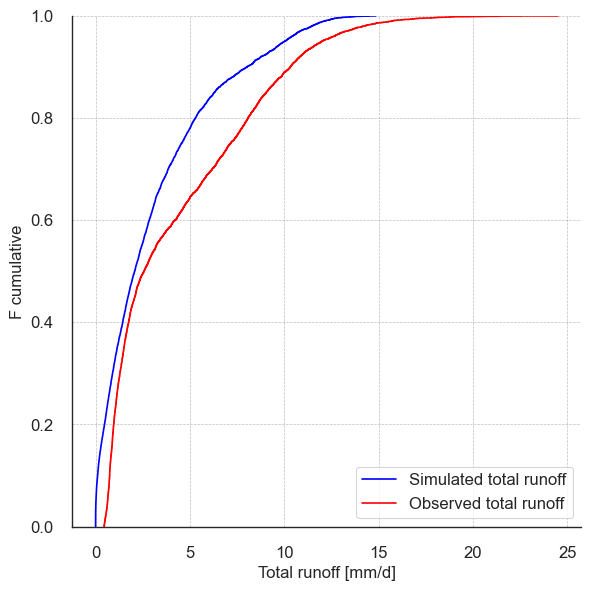

In [12]:
plot_ECDF(results=results, validation=training_data, palette=['blue', 'red'])

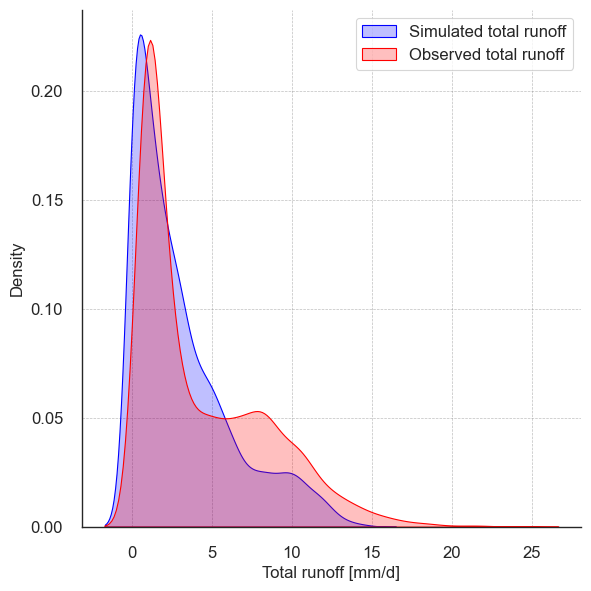

In [14]:
plot_KDE(results=results, validation=training_data, palette=['blue', 'red'])

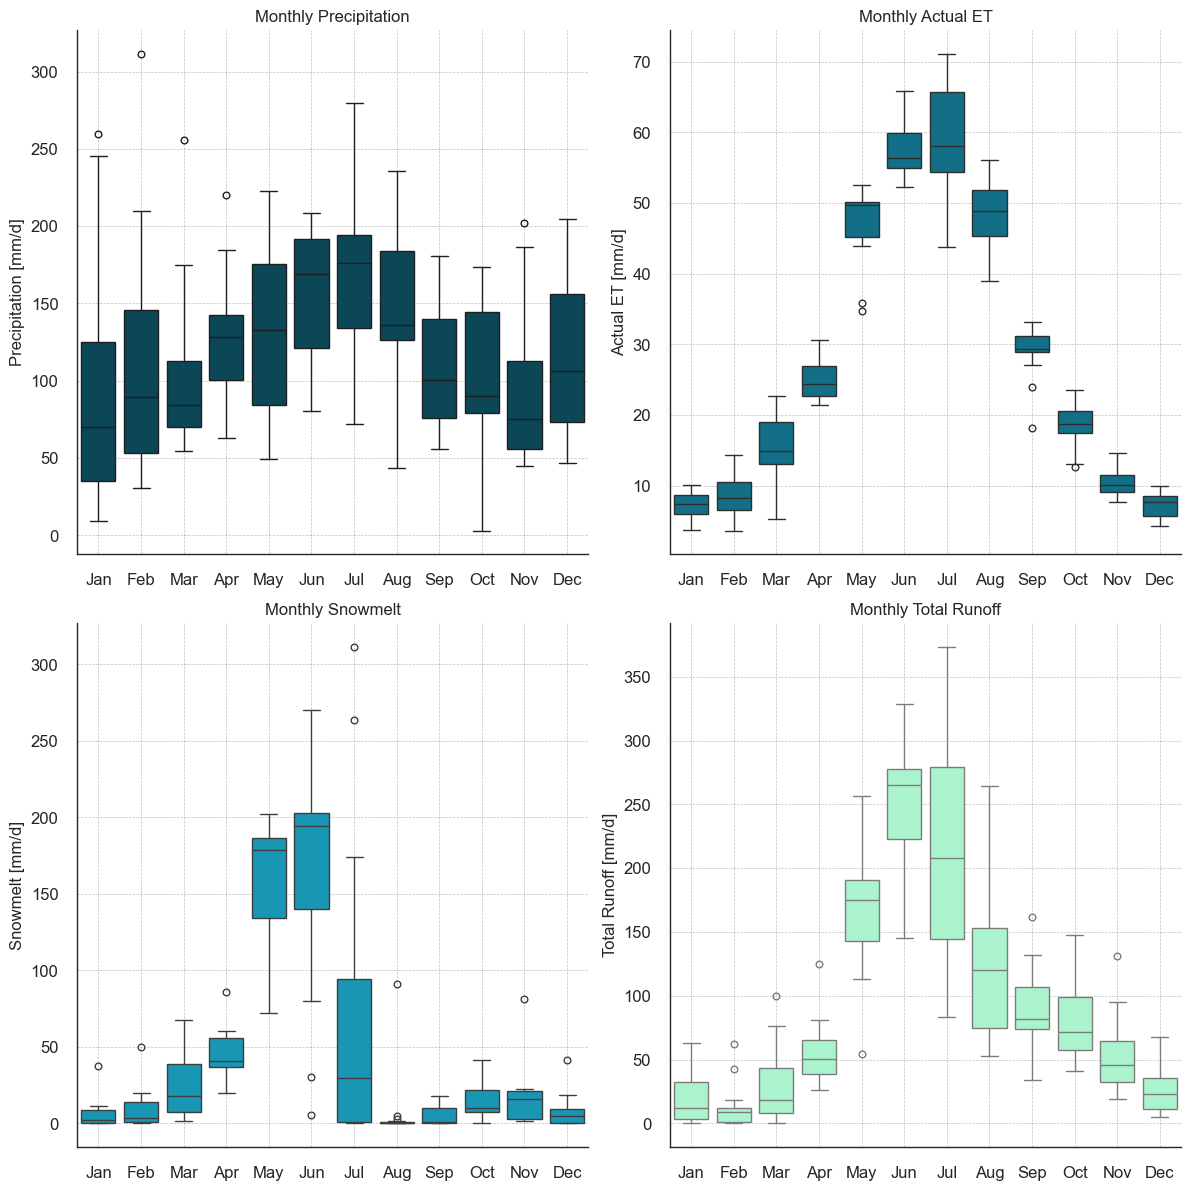

In [15]:
plot_monthly_boxplot(results=results)

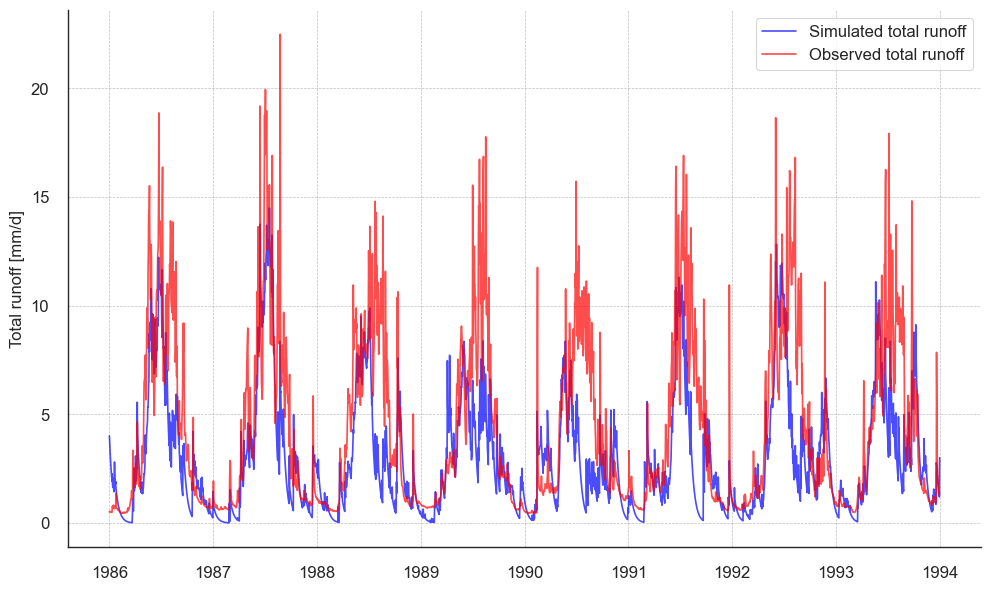

In [16]:
plot_timeseries(results=results, validation=training_data, start_year='1986', end_year='1993', palette=['blue', 'red'])

/Users/cooper/Desktop/bucket-model/bucket_model_plotter.py:342: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  results_filtered = results_filtered.resample('M').sum()
/Users/cooper/Desktop/bucket-model/bucket_model_plotter.py:343: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  validation_filtered = validation_filtered.resample('M').sum()


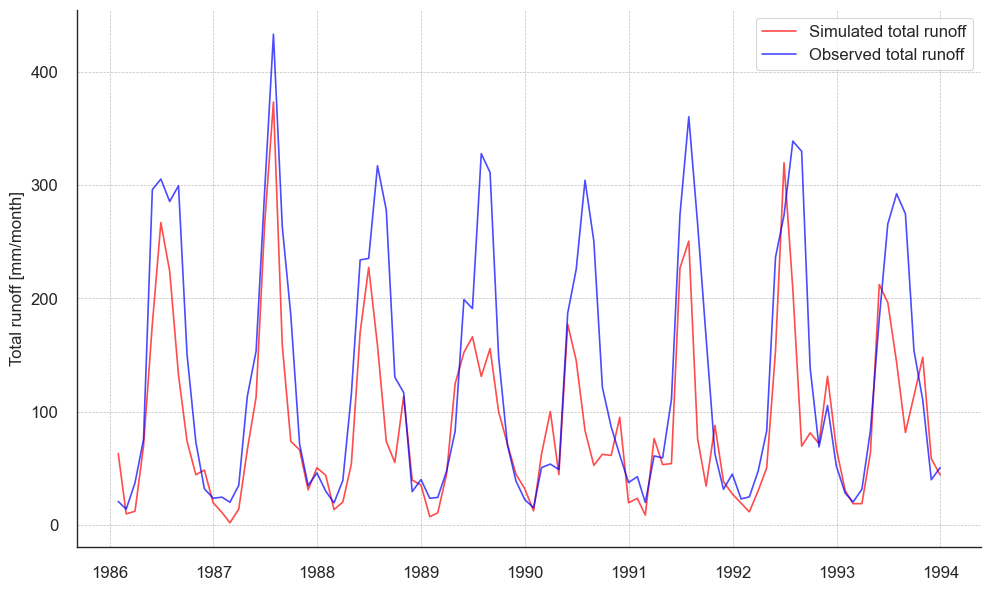

In [17]:
plot_timeseries(results=results, validation=training_data, start_year='1986', end_year='1993', monthly=True, palette=['red', 'blue'])